In [2]:
# Código que troca o Id no município 


In [3]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from texto import text_data
import statsmodels.api as sm
import matplotlib.pyplot as plt

# PARA DEIXAR EM GRAFICO NAO EDITAVEL
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display


# Preparação dos Dados


In [4]:
# carregando base de dados
data = pd.read_csv('DadosMilhao.csv')
dados = pd.DataFrame(data)

In [5]:
from texto import text_data

extracted_info = {}
for line in text_data.split('\n'):
    if 'STRING' in line or 'INT64' in line or 'FLOAT64' in line:
        parts = line.split()
        variable_name = parts[0]
        description = ' '.join(parts[2:])
        extracted_info[variable_name] = description

In [6]:
# filtrando colunas
dados = dados[[col for col in dados.columns if col[0] !='m']]
dados = dados.rename(columns=extracted_info)
listaFeatures = ['Nível de instrução', 'Idade calculada em anos', 'Cor ou raça', 'Sexo', 'Sabe ler e escrever', 'Quantos trabalhos tinha', 'Ocupação', 'Número de Pessoas na Família', 'Curso mais elevado que frequentou'] 
target = dados['Rendimento mensal total em julho de 2010, em reais']

dados = dados[dados['Rendimento mensal total em julho de 2010, em reais'] != 0]
for coluna in dados:
    try:
        if coluna not in listaFeatures:
            del dados[coluna]
    except:
        pass
dados['Target'] = target

In [7]:
# Remover dados incompletos
dados = dados.dropna(subset='Target')



faltando = dados.isnull().sum(axis=1)
# Filter rows that have at least 50% of their values filled
dados = dados[faltando <= len(dados.columns) / 2]
# preencher com a media
dados = dados.fillna(dados.mean())
dados = dados[dados['Cor ou raça'] != 9]
dados = dados[dados['Idade calculada em anos'] > 18]
dados = dados[dados['Idade calculada em anos'] < 100]

dados = dados[dados['Target'] < 4000]

print(len(dados))
dadosCodificados = dados.copy()


729195


In [8]:
# Formatando os valores que são qualitativos
DictCurso ={
    1: 'Elementar (primário)',
    2: 'Médio 1° ciclo (ginasial, etc.)',
    3: 'Médio 2° ciclo (científico, clássico, etc.)',
    4: 'Regular do ensino fundamental ou do 1° grau',
    5: 'Regular do ensino médio ou do 2° grau',
    6: 'Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1° grau',
    7: 'Educação de jovens e adultos ou supletivo de ensino médio ou do 2° grau',
    8: 'Superior - graduação',
    9: 'Mestrado ou doutorado',
    10: 'Alfabetização de jovens e adultos',
    11: 'Creche',
    12: 'Classe de alfabetização - CA',
    13: 'Maternal, jardim de infância etc.'
}
DictInstru ={
    1: 'Sem Instrução',
    2: 'Fundamental Completo',
    3: 'Médio Completo',
    4: 'Superior Completo',
    5: 'Não determinado',

}
DictRaca ={
    1: 'Branco',
    2: 'Preto',
    3: 'Amarelo',
    4: 'Pardo',
    5: 'Indigena',
}

dados['Curso mais elevado que frequentou'] = dados['Curso mais elevado que frequentou'].replace(DictCurso)
dados['Nível de instrução'] = dados['Nível de instrução'].replace(DictInstru)
dados['Cor ou raça'] = dados['Cor ou raça'].replace(DictRaca)
dados['Sexo'] = dados['Sexo'].astype('category')
dados['Cor ou raça'] = dados['Cor ou raça'].astype('category')
dados['Sabe ler e escrever'] = dados['Sabe ler e escrever'].astype('category')
dados['Curso mais elevado que frequentou'] = dados['Curso mais elevado que frequentou'].astype('category')
dados['Nível de instrução'] = dados['Nível de instrução'].astype('category')
dados['Sexo'] = dados['Sexo'].cat.rename_categories(['Homem', 'Mulher'])
dados['Sabe ler e escrever'] = dados['Sabe ler e escrever'].cat.rename_categories(['Sim', 'Não'])

dados.to_csv('DadosFinais.csv')
dados.tail(50)



,Sexo,Idade calculada em anos,Cor ou raça,Sabe ler e escrever,Curso mais elevado que frequentou,Nível de instrução,Quantos trabalhos tinha,Ocupação,Número de Pessoas na Família,Target
1499906,Mulher,38,Pardo,Sim,Educação de jovens e adultos ou supletivo de e...,Sem Instrução,1.000000,5223.000000,2.0,800.0
1499908,Mulher,58,Pardo,Sim,7.380717,Sem Instrução,1.000000,5221.000000,2.0,2500.0
1499909,Mulher,48,Preto,Sim,Alfabetização de jovens e adultos,Médio Completo,2.000000,5321.000000,2.0,2300.0
1499911,Mulher,60,Branco,Sim,"Médio 1° ciclo (ginasial, etc.)",Sem Instrução,1.042136,5905.354738,2.0,510.0
1499913,Mulher,87,Branco,Sim,Regular do ensino fundamental ou do 1° grau,Sem Instrução,1.042136,5905.354738,1.0,510.0
1499914,Mulher,33,Pardo,Sim,Alfabetização de jovens e adultos,Fundamental Completo,1.000000,7522.000000,3.0,215.0
1499915,Mulher,32,Pardo,Sim,Creche,Superior Completo,1.000000,2411.000000,4.0,3000.0
1499916,Mulher,59,Pardo,Sim,Classe de alfabetização - CA,Superior Completo,1.000000,2341.000000,2.0,1920.0
1499917,Mulher,28,Pardo,Sim,Educação de jovens e adultos ou supletivo de e...,Sem Instrução,1.000000,9112.000000,4.0,212.0
1499918,Mulher,61,Branco,Sim,Educação de jovens e adultos ou supletivo do e...,Sem Instrução,1.000000,5120.000000,2.0,80.0


# Projeto 02 de Ciência dos Dados
**Análise da Renda da População Brasileira**


### Análise Exploratória dos Dados




In [9]:
dados = pd.read_csv('DadosFinais.csv')
dados.drop('Unnamed: 0', axis=1, inplace=True)
dados.tail()

,Sexo,Idade calculada em anos,Cor ou raça,Sabe ler e escrever,Curso mais elevado que frequentou,Nível de instrução,Quantos trabalhos tinha,Ocupação,Número de Pessoas na Família,Target
729190,Homem,34,Branco,Sim,7.380716555969716,Sem Instrução,1.0,7112.0,4.0,150.0
729191,Homem,22,Pardo,Não,7.380716555969716,Sem Instrução,1.0,5223.0,6.0,50.0
729192,Homem,49,Branco,Sim,Educação de jovens e adultos ou supletivo do e...,Sem Instrução,1.0,7112.0,4.0,800.0
729193,Homem,20,Pardo,Sim,Alfabetização de jovens e adultos,Médio Completo,1.0,8122.0,5.0,1000.0
729194,Homem,45,Pardo,Sim,Regular do ensino médio ou do 2° grau,Sem Instrução,1.0,6114.0,2.0,510.0


Text(0, 0.5, 'R$')

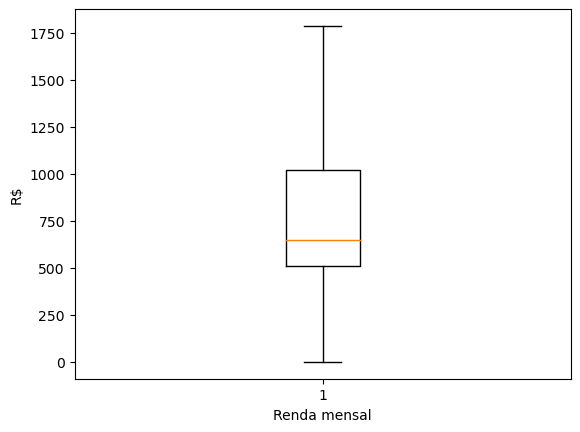

In [10]:
# plotar renda without sem outliers
plt.boxplot(dados['Target'], showfliers=False)
plt.xlabel('Renda mensal')
plt.ylabel('R$')


Text(0, 0.5, 'Renda mensal R$')

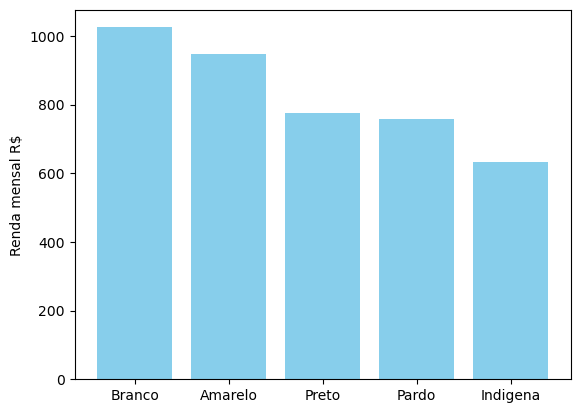

In [11]:
# visualizar renda para cada cor
rendaPorCor = dados.groupby('Cor ou raça')['Target'].mean()
rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
rendaPorCor_df = rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
plt.bar(rendaPorCor_df.index, rendaPorCor_df['Target'], color='skyblue')
plt.ylabel('Renda mensal R$')


Text(0.5, 0, 'Renda mensal')

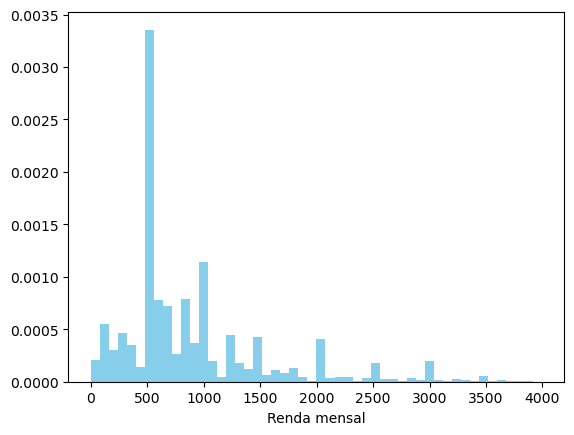

In [12]:
#remove outliers
dados = dados[dados['Target'] < 10000]
plt.hist(dados['Target'], bins=50, color='skyblue', density=True)
plt.xlabel('Renda mensal')

Text(0, 0.5, 'Renda mensal R$')

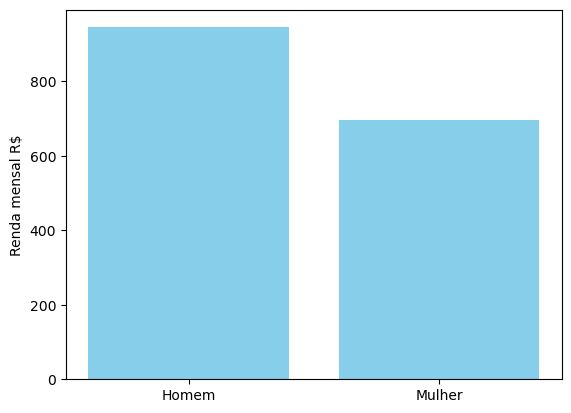

In [13]:
# visualizar renda para cada Sexo
rendaPorCor = dados.groupby('Sexo')['Target'].mean()
rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
rendaPorCor_df = rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
plt.bar(rendaPorCor_df.index, rendaPorCor_df['Target'], color='skyblue')
plt.ylabel('Renda mensal R$')


Text(0, 0.5, 'Renda mensal R$')

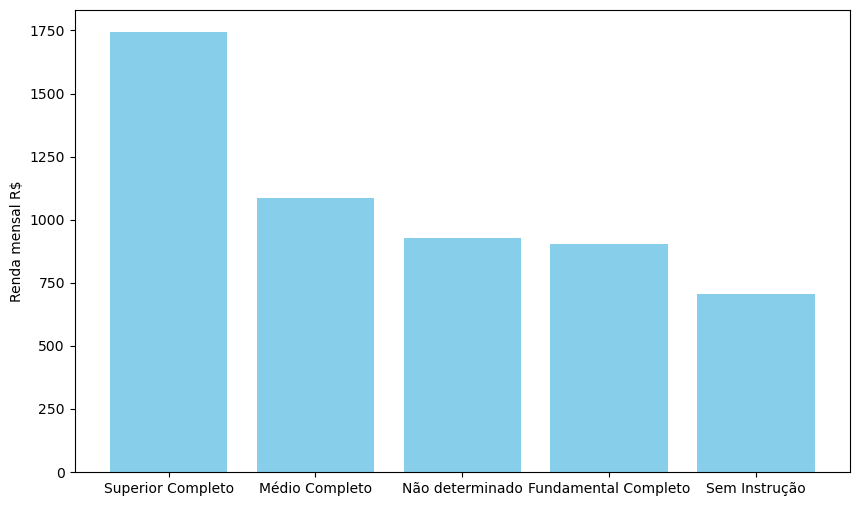

In [14]:
# visualizar renda para cada Nivel de instrucacao
rendaPorCor = dados.groupby('Nível de instrução')['Target'].mean()
rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
rendaPorCor_df = rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(rendaPorCor_df.index, rendaPorCor_df['Target'], color='skyblue')
plt.ylabel('Renda mensal R$')

Text(0.5, 0, 'Idade')

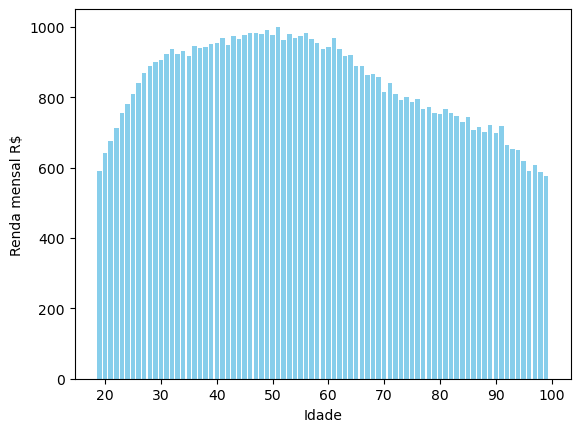

In [15]:
# visualizar renda por idade grafico de dispersao
rendaPorCor = dados.groupby('Idade calculada em anos')['Target'].mean()
rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
rendaPorCor_df = rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
plt.bar(rendaPorCor_df.index, rendaPorCor_df['Target'], color='skyblue')
plt.ylabel('Renda mensal R$')
plt.xlabel('Idade')


Text(0.5, 0, 'Quantos trabalhos tinha')

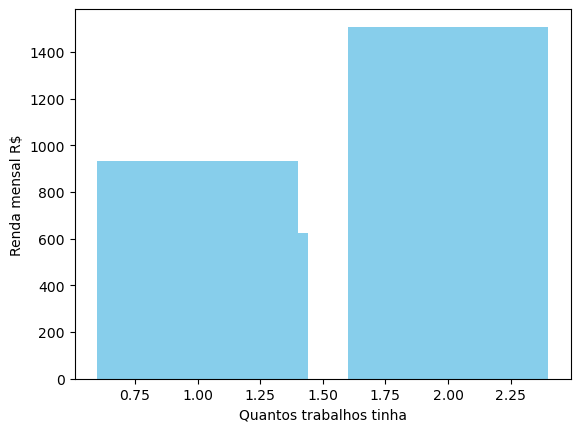

In [16]:
rendaPorCor = dados.groupby('Quantos trabalhos tinha')['Target'].mean()
rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
rendaPorCor_df = rendaPorCor.to_frame().sort_values(by='Target', ascending=False)
plt.bar(rendaPorCor_df.index, rendaPorCor_df['Target'], color='skyblue')

plt.ylabel('Renda mensal R$')
plt.xlabel('Quantos trabalhos tinha')


# Modelos de Previsão


## Random trees



### Passo 1: Ajustando o modelo

Para iniciar devemos fazer a separação das variáveis entre resposta e preditoras (explicativas):

In [17]:
dados = dadosCodificados
# dividir target em 5 grupos de renda A, B, C, D, E
dados['Target'] = pd.cut(dados['Target'], bins=[, labels=[1, 2, 3, 4, 5])
y = dados['Target']
X = dados.drop('Target', axis=1)
dados.head()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (2236466151.py, line 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (436259, 9)
X test shape: (109065, 9)
y train shape: (436259,)
y test shape: (109065,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated

RandomForestRegressor()

In [ ]:
print('precision:', rf.score(X_test, y_test))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


precision: 0.27741803924732655


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
data = pd.read_csv('DadosFinais.csv')
data = data.sample(frac=0.5, random_state=0)
# Exclude 'Unnamed: 0' and 'Target' from the features
y = data['Target']
X = data.drop(['Unnamed: 0', 'Target'], axis=1)

# Updating the list of numerical columns
numerical_cols = ['Idade calculada em anos','Quantos trabalhos tinha','Número de Pessoas na Família'] 
categorical_cols = ['Nível de instrução', 'Cor ou raça', 'Sexo', 'Sabe ler e escrever', 'Curso mais elevado que frequentou', 'Ocupação']

# Updating the preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Updating the preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0, verbose=2)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# Splitting the data into train and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing and training the model
clf.fit(X_train, y_train)
model_file_path = 'trained_model.joblib'

# Save the model to the specified file
dump(clf, model_file_path)

print(f"Model saved to {model_file_path}")
# Output a message to indicate completion
"Model training complete."


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 18.6min finished


Model saved to trained_model.joblib


'Model training complete.'

In [ ]:
# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import load
model = load('trained_model.joblib')
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated

MAE: 981.0032114605594
MSE: 22027267.398350645


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is

# Segundo modelo
### Modelo perso

In [20]:
dados = pd.read_csv('DadosFinais.csv')
from sklearn.model_selection import train_test_split
dados.drop('Unnamed: 0', axis=1, inplace=True)
# make occupation column object
dados['Ocupação'] = dados['Ocupação'].astype('object')
y = dados['Target']
X = dados.drop(['Target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [22]:
class oi:
    def __init__(self, data, target, depth=2):
        self.data = data
        self.coefficients = {}
        self.target = target
        self.depth = depth
        self.CatValues = self.calculate_differences()
    def fit(self):
        for coluna in self.data:
            if self.data[coluna].dtype.name in ['int64', 'float64'] and coluna != self.target:
                self.coefficients[coluna] = np.polyfit(self.data[coluna], self.data[self.target], 1)
    def calculate_differences(self):
        data = self.data
        target = self.target
        overall_mean = data[target].mean()
        categorical_columns = [col for col in data.columns if data[col].dtype.name == 'object' and col != target]
        differences = {}
        for cols in categorical_columns:
            mean_by_group = data.groupby(cols)[target].mean()
            differences[cols] = (mean_by_group - overall_mean).to_dict()
        return differences
    def predict(self, row):
        NumericPredicts = []
        CatPredicts = []
        for coluna in row.index:
            if coluna in self.NumericValues:
                NumericPredicts.append(self.NumericValues[coluna][row[coluna]])
            elif coluna in self.CatValues:
                CatPredicts.append(self.differences[cols][row[cols]])

        NumericPredicts = np.array([NumericPredicts])
        CatPredicts = np.array([CatPredicts])
        prediction = NumericPredicts.mean()
        prediction += CatPredicts.mean()
        return prediction
Model = oi(dados, 'Target', 1)
Model.fit()
x = X_test.iloc[4]
print(Model.predict(x), y_test.iloc[4])


AttributeError: 'oi' object has no attribute 'NumericValues'

3990.0
R-Squared: 0.19
Mean Squared Error: 385856.62
y = 0.12x + 853.87


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `

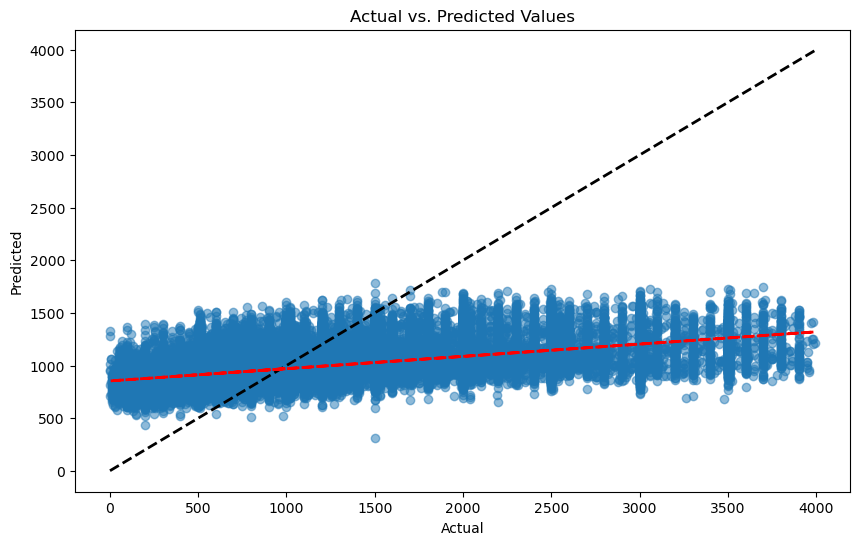

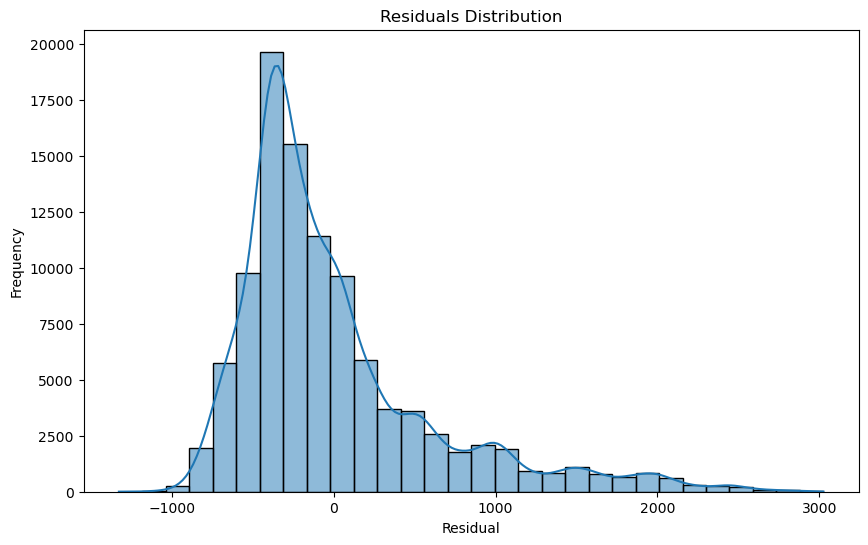

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Model' is your trained model and 'X_test', 'y_test' are your test datasets
predictions = []
for i in range(len(X_test)):
    row = X_test.iloc[i]
    predictions.append(Model.predict(row))
predictions = np.array(predictions)
print(y_test.max())
# Calculate R-squared and MSE
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f"R-Squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Plotting Prediction vs. Actuals

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
# draw tendency line of predictions
z = np.polyfit(y_test, predictions, 1)
m = z[0]
b = z[1]
print(f"y = {m:.2f}x + {b:.2f}")
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r--', lw=2)  # Tendency line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plotting Residuals
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()
